In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

def pol2cart(rho, theta):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

In [3]:
class Vector:
    def __init__(self, tail_x, tail_y, mag_x, mag_y):
        self.tail_x = tail_x
        self.tail_y = tail_y
        
        self.mag_x = mag_x
        self.mag_y = mag_y
        
        # self.head_x = tail_x + mag_x
        # self.head_y = tail_y + mag_y
        
        # for if need convert vector's magnitude into polar coords
        self.rho = None
        self.theta = None
        
    def polar(self):
        self.rho, self.theta = cart2pol(self.mag_x, self.mag_y)
        
    def cart(self):
        self.mag_x, self.mag_y = pol2cart(self.rho, self.theta)
        # update vector head
        # self.head_x = self.tail_x + self.mag_x
        # self.head_y = self.tail_y + self.mag_y 

In [4]:
def vector_bilinear_interpolation(vectors, new_vector):
    
    # convert magnitudes to polar
    for v in vectors:
        v.polar()
        
    # linearly interpolate top two points
    # linearly interpoalte bottom two points
    # then linearly interpolate with the two new points
    top_vectors = []
    bottom_vectors = []

    for v in vectors:
        if v.tail_y == int(new_vector.tail_y):
            bottom_vectors.append(v)
        else:
            top_vectors.append(v)
            
    # for first two linearly interps
    weight_1 = new_vector.tail_x - top_vectors[0].tail_x
    # print(f'weights: {(weight_1, weight_2)}')

    # horizontal top
    rho_1 = (weight_1 * top_vectors[1].rho) + ((1.0 - weight_1) * top_vectors[0].rho)
    theta_1 = (weight_1 * top_vectors[1].theta) + ((1.0 - weight_1) * top_vectors[0].theta)

    # horizontal bottom
    rho_2 = (weight_1 * bottom_vectors[1].rho) + ((1.0 - weight_1) * bottom_vectors[0].rho)
    theta_2 = (weight_1 * bottom_vectors[1].theta) + ((1.0 - weight_1) * bottom_vectors[0].theta)

    # final interp
    weight_2 = new_vector.tail_y - bottom_vectors[0].tail_y
    # vertial
    rho_3 = (weight_2 * rho_1) + ((1.0 - weight_2) * rho_2)
    theta_3 = (weight_2 * theta_1) + ((1.0 - weight_2) * theta_2)       
    
    new_vector.rho = rho_3
    new_vector.theta = theta_3
    new_vector.cart()
    
    return new_vector

In [5]:
def view_4_vectors_and_interped_vector(vectors, new_vector):
    x_tails = []
    y_tails = []
    x_mags = []
    y_mags = []

    for v in vectors:
        x_tails.append(v.tail_x)
        y_tails.append(v.tail_y)

        x_mags.append(v.mag_x)
        y_mags.append(v.mag_y)
        
    plt.figure()
    plt.quiver(x_tails, y_tails, x_mags, y_mags, color='k', linewidth=0.7)
    plt.quiver(new_vector.tail_x, new_vector.tail_y, new_vector.mag_x, new_vector.mag_y, color='b', linewidth=0.7)

In [26]:
vectors = []

vectors.append(Vector(0,0,0,1))

vectors.append(Vector(0,1,0,1))

vectors.append(Vector(1,0,1,0))

vectors.append(Vector(1,1,1,0))

new_vector = Vector(0, 0, 0, 0)

In [27]:
new_vector = vector_bilinear_interpolation(vectors, new_vector)

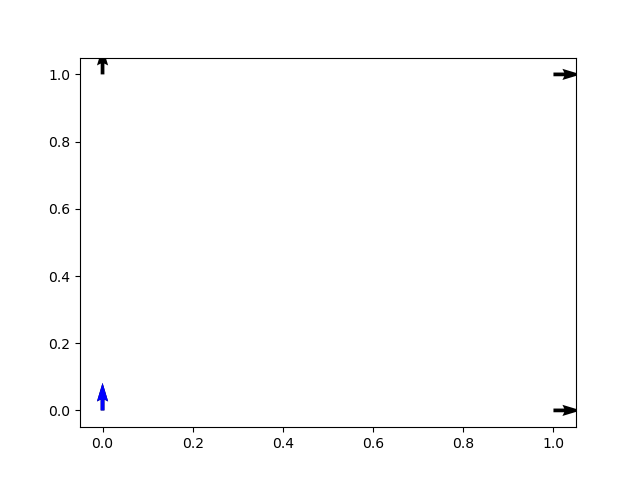

In [28]:
view_4_vectors_and_interped_vector(vectors, new_vector)

In [9]:
new_vector.mag_x, new_vector.mag_y

(-5.0, 6.123233995736766e-16)